<img src='Screenshot_2020-05-26 IMDb - Wikipedia.png'></img>

# Analysis: IMDb top 250 movies:

**Link**: https://www.imdb.com/chart/top/

**IMDb (Internet Movie Database)** is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('IMDBTop250.csv', encoding='latin-1')

In [3]:
df.head()

,Movie title,Release year,Ratings,User count,Director,Language,IMDB link
0,The Shawshank Redemption,(1994),9.2,"2,242,273",Frank Darabont,English,https://www.imdb.com/title/tt0111161/
1,The Godfather,(1972),9.1,"1,546,624",Francis Ford Coppola,English Italian Latin,https://www.imdb.com/title/tt0068646/
2,The Godfather: Part II,(1974),9.0,"1,081,373",Francis Ford Coppola,English Italian Spanish Latin Sicilian,https://www.imdb.com/title/tt0071562/
3,The Dark Knight,(2008),9.0,"2,211,472",Christopher Nolan,English Mandarin,https://www.imdb.com/title/tt0468569/
4,12 Angry Men,(1957),8.9,"656,021",Sidney Lumet,English,https://www.imdb.com/title/tt0050083/


In [4]:
df['Release year'] = df['Release year'].apply(lambda year: year.replace('(', '').replace(')', ''))
df['Release year'] = df['Release year'].astype('int64')

## Rating distribution

The ratings of these movies range from 9.2 to 8.0. Most of the movies are rated between 8.0 to 8.4 which could be considered as a good movie to watch. And most movies have got a rating of 8.1. 

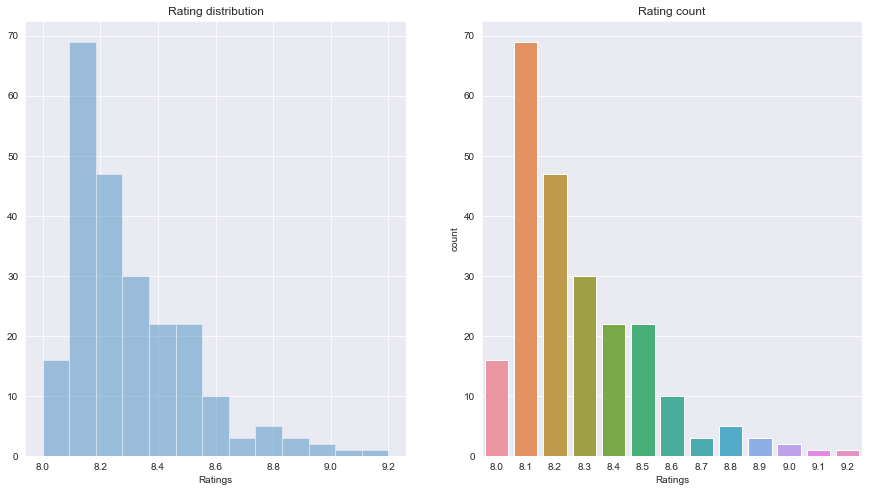

In [5]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].title.set_text('Rating distribution')
axs[1].title.set_text('Rating count')
sns.distplot(df['Ratings'], kde=False, ax=axs[0])
sns.countplot(df['Ratings'], ax=axs[1])

## Year wise count of movies:

These movies are distributed between the years 1921 to 2019. A total of 81 years are considered between this range and the top 250 movies from these years have been considered. Irrespective of the ratings achieved by the movies, most movies are from the year 1995 (count = 8). After the year 1995, most years are have movies >= 5. This consistency could be considered with 2 aspects, these are:
1. Awarness about most movies and the audience age groups too. 
2. The most quality cinema has emerged after 1960s(Second golden age of cinema).

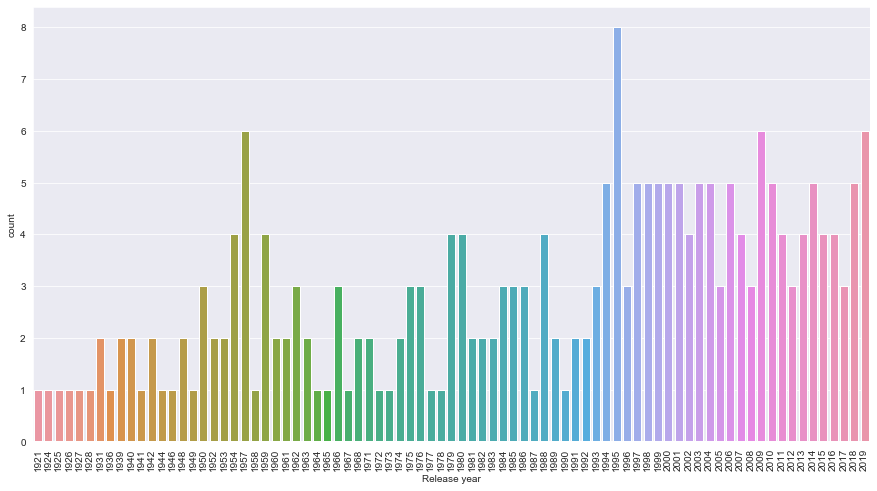

In [6]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(df.sort_values('Release year')['Release year'])

## Ratings Vs. year

Top 5 movies are:
1. The Shawshank Redemption	 (1994),      9.2	
2. The Godfather	         (1972),      9.1
3. The Godfather: Part II	 (1974),     9.0
4. The Dark Knight	         (2008),      9.0
5. 12 Angry Men	             (1957),	     8.9

The similar spikes can be seen in the graph ploted below, the years 1994, 1972, 1974, 2008 and 1957 have a higher spike seen.

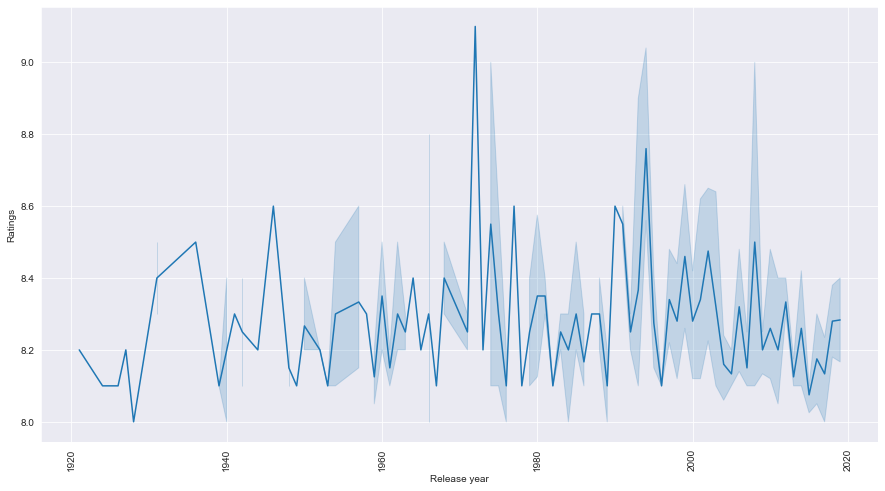

In [7]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.lineplot(x=df['Release year'], y=df['Ratings'])

## Top 5 Movie's directors

**Top 5 movies are:**
1. The Shawshank Redemption	 (1994)  	
2. The Godfather	         (1972)
3. The Godfather: Part II	 (1974)
4. The Dark Knight	         (2008)
5. 12 Angry Men	             (1957)

**Directors List:**
1. Frank Darabont has 2 movies on this 250 movies list (The Shawshank Redemption and The Green Mile)
2. Francis Ford Coppola has 3 movies on this list (The Godfather (Part I&II), Apocalypse Now)
3. Christopher Nolan has 7 movies (The batman trilogy, Inception, Interstellar, Memento, The prestige)
4. Sidney Lumet has 2 movies (12 Angry Men, Network)

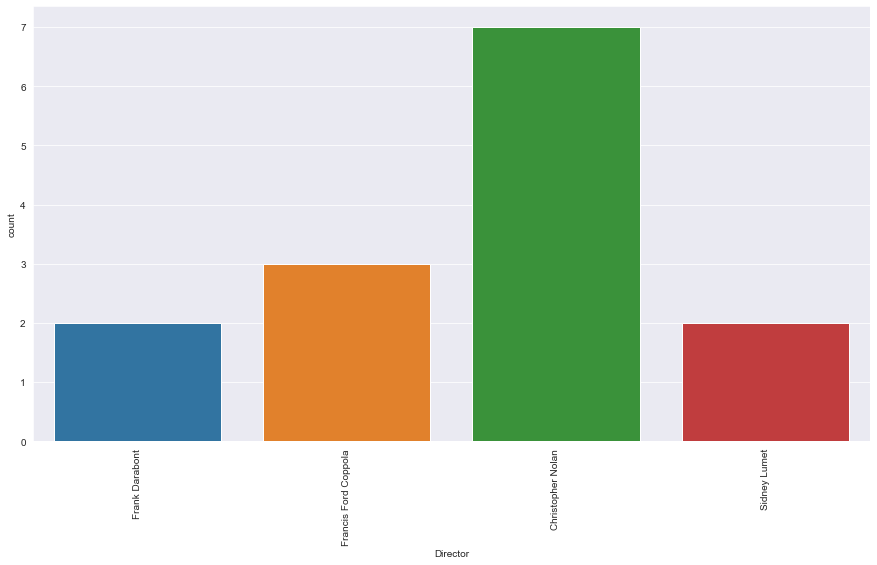

In [8]:
top_directors_ratings = df.head()['Director'].unique()
top_directors_ratings

filt_top_directors = (df['Director'] == top_directors_ratings[0]) | (df['Director'] == top_directors_ratings[1]) | (df['Director'] == top_directors_ratings[2]) | (df['Director'] == top_directors_ratings[3])

df[filt_top_directors]

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(df[filt_top_directors]['Director'])

## Top 5 Directors with most movies on the list: 

In [9]:
top_5_directors = df['Director'].value_counts().head()
top_5_directors

Martin Scorsese      7
Stanley Kubrick      7
Christopher Nolan    7
Steven Spielberg     6
Alfred Hitchcock     6
Name: Director, dtype: int64

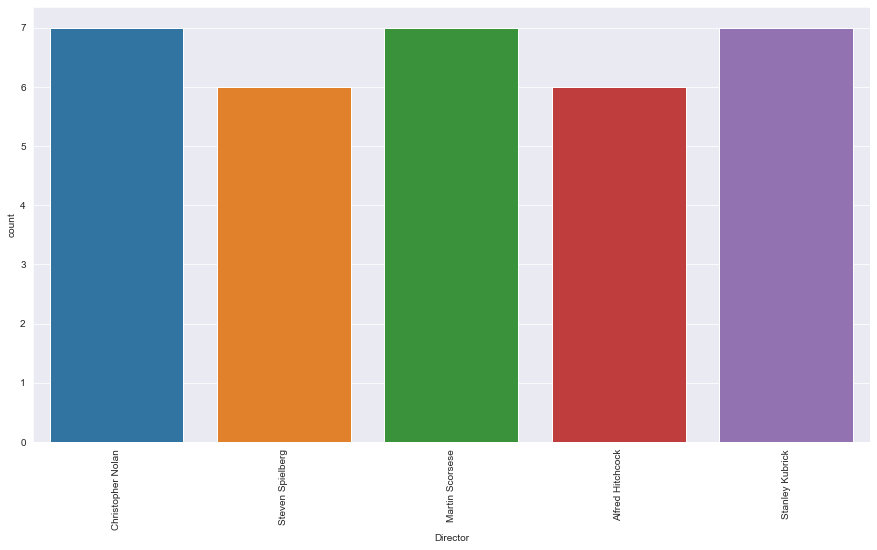

In [10]:
filt_top_directors = (df['Director'] == 'Martin Scorsese') | (df['Director'] == 'Stanley Kubrick') | (df['Director'] == 'Christopher Nolan') | (df['Director'] == 'Alfred Hitchcock') | (df['Director'] == 'Steven Spielberg')

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(df[filt_top_directors]['Director'])

## Top 5 directors with highest average ratings:

**These directors are:**
1. Frank Darabont, 8.850000
2. Francis Ford Coppola, 8.833333
3. Peter Jackson,	8.800000
4. Irvin Kershner,	8.700000
5. Robert Zemeckis,	8.650000

In [11]:
def Rating_avg(director):
    return df[df['Director'] == director]['Ratings'].mean()

ratings = pd.Series(df['Director'].unique()).apply(Rating_avg)

In [12]:
df_avg_ratings = pd.DataFrame({'Director' : df['Director'].unique(), 'Ratings' : ratings})

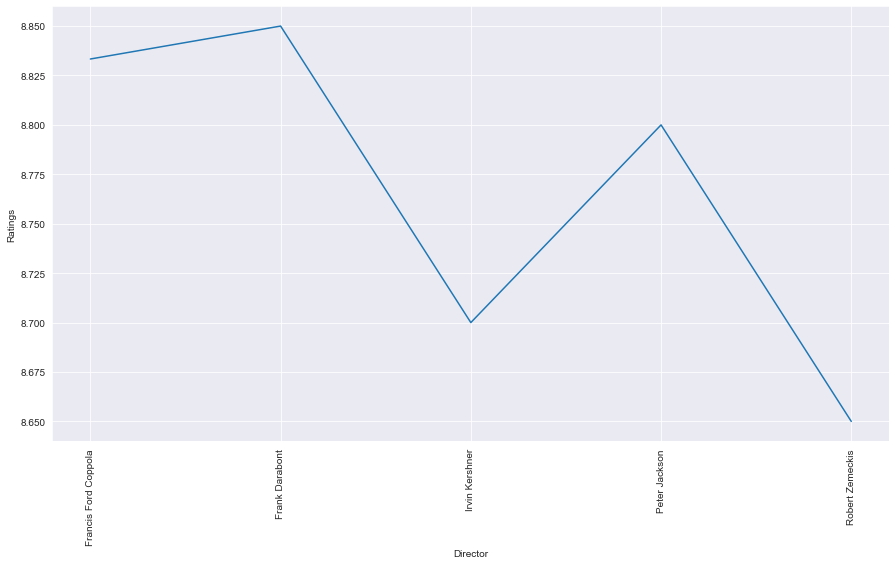

In [13]:
df_avg_ratings.sort_values('Ratings', ascending=False).head()

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.lineplot(x=df_avg_ratings.sort_values('Ratings', ascending=False).head()['Director'], y=df_avg_ratings.sort_values('Ratings', ascending=False).head()['Ratings'])

## User Count, the users that voted for that particular movie

The rating system on IMDb works on the ratings its users give, it also tells that how popular a movie is according to its user count. Every registered user gives his/her review of the particular.

The top 5 movies are: 
1. The Shawshank Redemption - 2,242,273
2. The Dark Knight - 2,211,472
3. Inception - 1,965,422
4. Fight Club - 1,784,013
5. Pulp Fiction	- 1,756,497

In [14]:
df['User count'] = df['User count'].apply(lambda year: year.replace(',', ''))
df['User count'] = df['User count'].astype('int64')

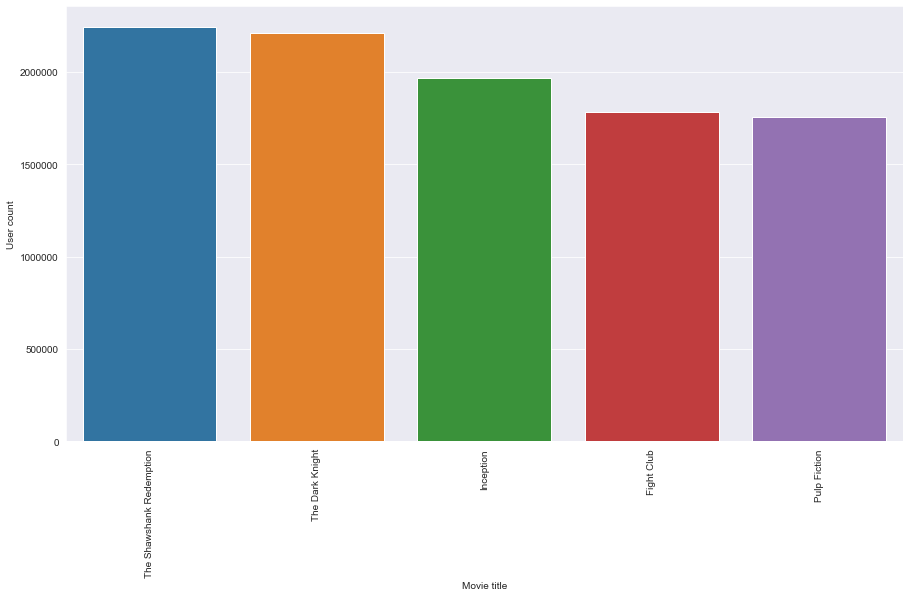

In [15]:
df.sort_values('User count', ascending=False).head()

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.barplot(x=df.sort_values('User count', ascending=False).head()['Movie title'], y=df.sort_values('User count', ascending=False).head()['User count'])

## Language distribution:

Almost over 130 movies are of the english language. Almost 81.4% of the movie going audience looks for a english language movie. As english is considered to be a very common language for communication most of the audience knows the language very well.

In [16]:
lang = []
def language(l):
    for i in l.split(' '):
        if not(i == 'See' or i =='' or i == 'more'):
            lang.append(i)

df['Language'].apply(language)
lang

['English',
 'English',
 'Italian',
 'Latin',
 'English',
 'Italian',
 'Spanish',
 'Latin',
 'Sicilian',
 'English',
 'Mandarin',
 'English',
 'Latin',
 'English',
 'Hebrew',
 'German',
 'Polish',
 'English',
 'Quenya',
 'Old',
 'English',
 'Sindarin',
 'English',
 'Spanish',
 'French',
 'English',
 'Sindarin',
 'English',
 'English',
 'English',
 'Japanese',
 'French',
 'English',
 'English',
 'Sindarin',
 'Old',
 'English',
 'English',
 'English',
 'Italian',
 'English',
 'Italian',
 'German',
 'English',
 'Portuguese',
 'English',
 'Latin',
 'English',
 'English',
 'French',
 'German',
 'Czech',
 'Korean',
 'English',
 'Japanese',
 'English',
 'French',
 'English',
 'English',
 'Hungarian',
 'Spanish',
 'French',
 'English',
 'Swahili',
 'Xhosa',
 'Zulu',
 'English',
 'English',
 'German',
 'Russian',
 'English',
 'English',
 'Spanish',
 'English',
 'English',
 'English',
 'English',
 'Cantonese',
 'French',
 'English',
 'English',
 'English',
 'French',
 'German',
 'Italian',
 'Ita

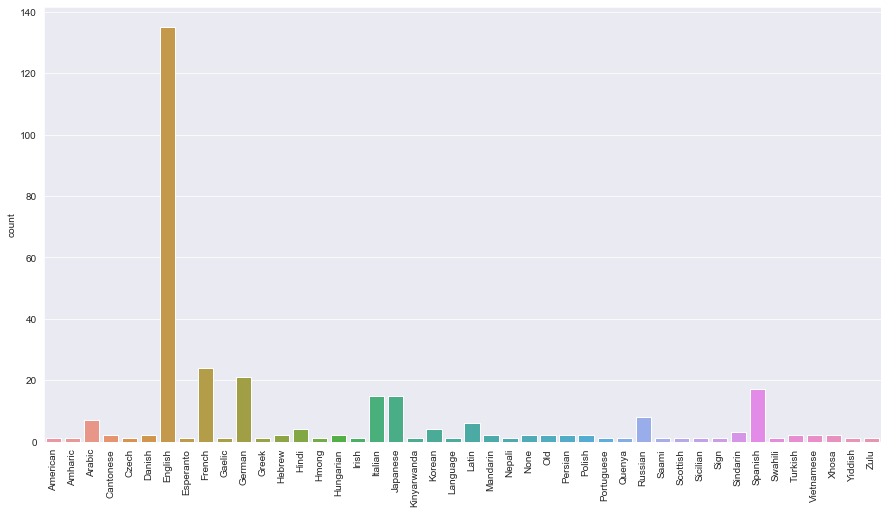

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(pd.Series(lang).sort_values())

## User count Vs Ratings

As the user count increases, the ratings too increase, there's a slight drop for the ratings between the ratings 8.8 to 9, because most users find this rating as an average rating slot.

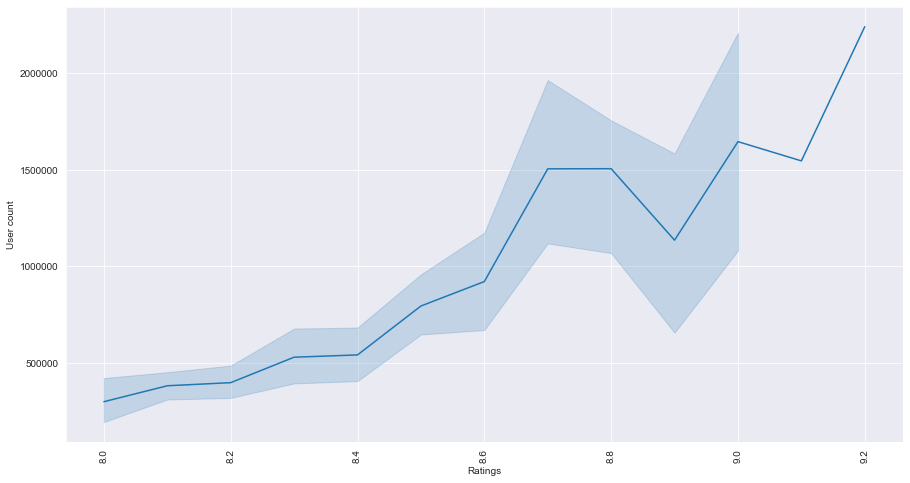

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x='Ratings', y='User count', data=df.sort_values('User count'))

## Results:

The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. As of 2 May 2020, The Shawshank Redemption is 1 on the list. The "Top 250" rating is based on only the ratings of "regular voters". The number of votes a registered user would have to make to be considered as a user who votes regularly has been kept secret. IMDb has stated that to maintain the effectiveness of the Top 250 list they "deliberately do not disclose the criteria used for a person to be counted as a regular voter". In addition to other weightings, the Top 250 films are also based on a weighted rating formula referred to in actuarial science as a credibility formula. This label arises because a statistic is taken to be more credible the greater the number of individual pieces of information; in this case from eligible users who submit ratings. Although the current formula is not disclosed, IMDb originally used the following formula to calculate their weighted rating:

W =   ( R ⋅ v + C ⋅ m ) / v + m 
where:

    W   = weighted rating
    R   = average for the movie as a number from 1 to 10 (mean) = (Rating)
    v   = number of votes for the movie = (votes)
    m   = minimum votes required to be listed in the Top 250 (currently 25,000)
    C   = the mean vote across the whole report (currently 7.0)

IMDb still tends to have hatred for its rating and across various articles it still shouldn't be considered as a basis for considering a movie to be good or bad. The only thing that confuses me is that a movie could be very good for someone and okayish for someone else, IMDb does act as an interface for people to give their judgements about a particular movie. 

Considering the user vote count, a movie like 'The Shawshank Redemption' is at the top, there are factors more than just the movie being good. The movie has a total of 2,242,273 votes, with the increase in votes, the rating does increase. But for a movie that's not of the english language, it wouldn't have that audience, or that many votes, hence leading to a lower rating. IMDb has tried its best in giving perfect and oparticular ratings but it still depends on your movie choices, it depends on your taste of movies.

Also IMDb as I had mentioned above, only considers a certain set of their users to vote for the 'Top 250 movies' category, and they haven't mentioned any criteria for selecting these 'certain' registered users. 

## References:

1. https://en.wikipedia.org/wiki/IMDb
2. https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic